In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Step 1

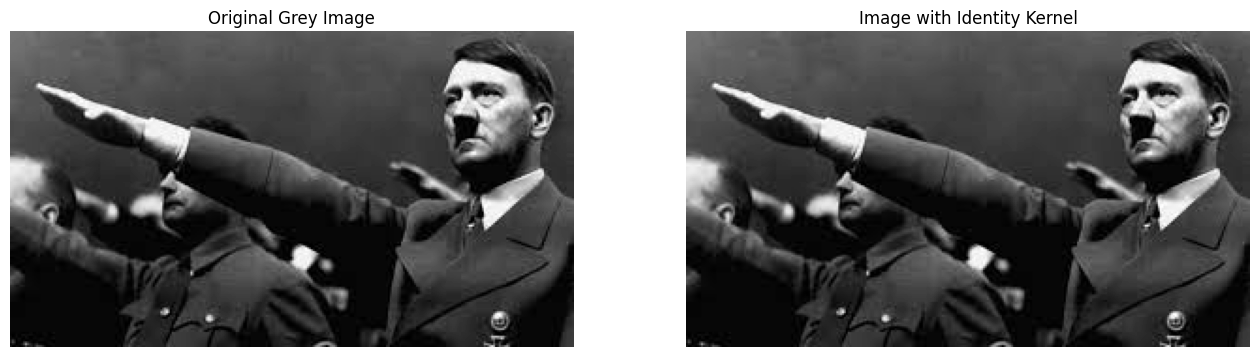

In [44]:
path="/kaggle/input/images/image dataset/image 1.jpeg"
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
identity_krnl=np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
filtered_img = cv2.filter2D(img,-1,identity_krnl)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("Original Grey Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Image with Identity Kernel')
plt.axis('off')

plt.show()


# Custom Kernal

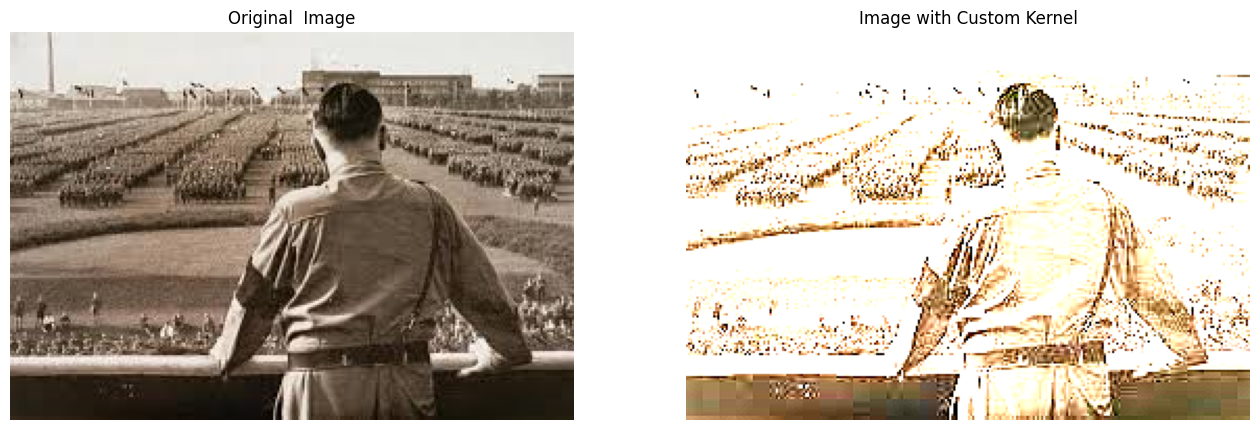

In [45]:
path2="/kaggle/input/images/image dataset/image 2.jpeg"

img=cv2.imread(path2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

custom_sherpen_krnl=np.array([
    [0,-1,0],
    [-1,8,-1],
    [0,-1,0]
])
filtered_img = cv2.filter2D(img,-1,custom_sherpen_krnl)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original  Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_img)
plt.title('Image with Custom Kernel')
plt.axis('off')

plt.show()

# Explanation : 
The center value is higher than other values , which sharpens the image and the surronding values -1 highlights the edges by substracting the neighbouring pixels

# Step 2

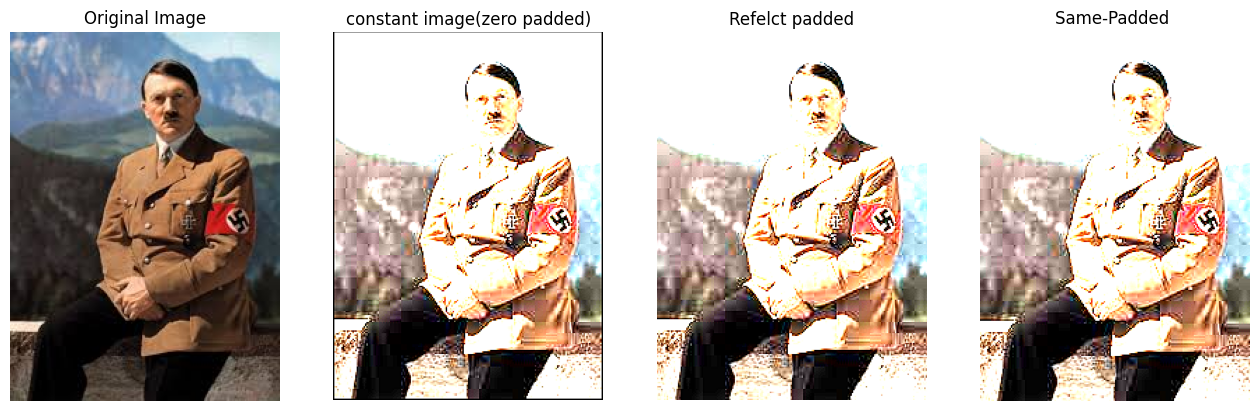

In [46]:
path3="/kaggle/input/images/image dataset/image 3.jpeg"
img=cv2.imread(path3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#zero padding
zero_padded=np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
zero_padded_img=cv2.filter2D(zero_padded, -1, custom_sherpen_krnl)

# Reflect padding

reflect_padded=np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='reflect')
reflect_padded_img=cv2.filter2D(reflect_padded, -1, custom_sherpen_krnl)

#Same padding

same_padded_img=cv2.filter2D(img, -1, custom_sherpen_krnl)

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(zero_padded_img)
plt.title('constant image(zero padded)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(reflect_padded_img)
plt.title('Refelct padded')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(same_padded_img)
plt.title('Same-Padded ')
plt.axis('off')

plt.show()


# Filter for noise reduction 

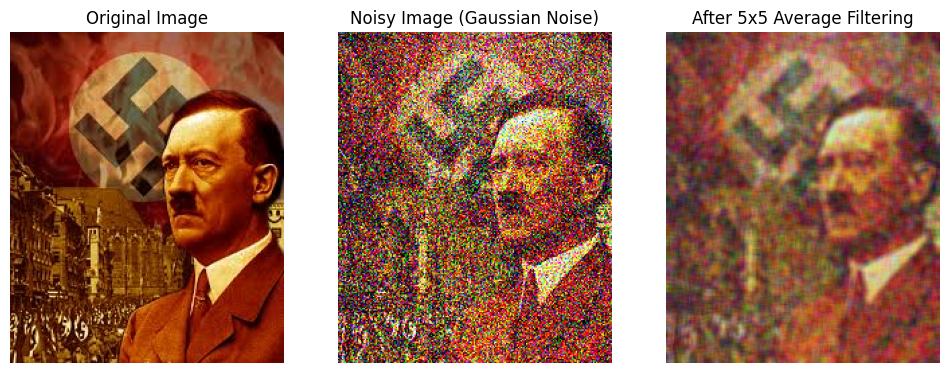

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path4 = "/kaggle/input/images/image dataset/image 4.jpeg"
img = cv2.imread(path4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

noise = np.random.normal(10, 100, img.shape).astype(np.int16)  
gau_noise_img = np.clip(img + noise, 0, 255).astype(np.uint8) 

avg_filtered_img = cv2.blur(gau_noise_img, (5, 5))

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gau_noise_img)
plt.title("Noisy Image (Gaussian Noise)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(avg_filtered_img)
plt.title("After 5x5 Average Filtering")
plt.axis("off")

plt.show()


# explaination 

avg filter smooths the img by avgeraging the neighbouring value but the image significantly looses details

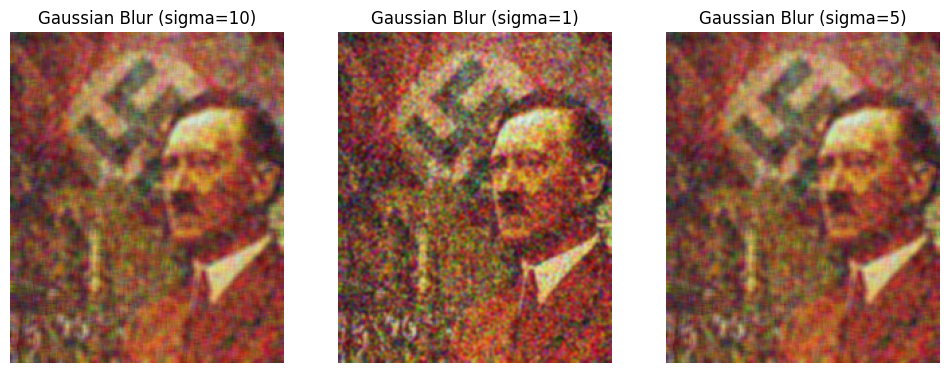

In [48]:

gaussian_blur_1 = cv2.GaussianBlur(gau_noise_img, (5, 5), 10)
gaussian_blur_2 = cv2.GaussianBlur(gau_noise_img, (5, 5), 1)
gaussian_blur_3 = cv2.GaussianBlur(gau_noise_img, (5, 5), 5)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_blur_1)
plt.title("Gaussian Blur (sigma=10)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur_2)
plt.title("Gaussian Blur (sigma=1)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur_3)
plt.title("Gaussian Blur (sigma=5)")
plt.axis("off")

plt.show()


# ovserbation 
smaller sigma results in less blur or smoothing 

# Step 4

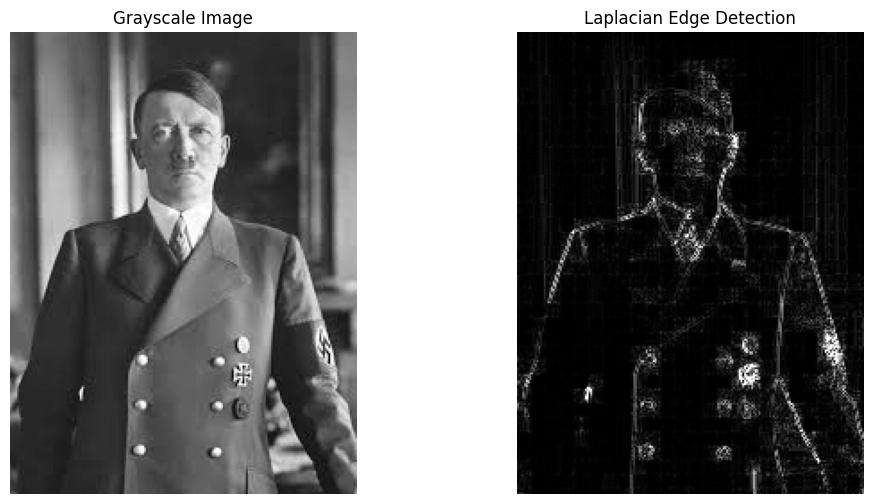

In [49]:


path5 = "/kaggle/input/images/image dataset/image 5.jpeg"
img = cv2.imread(path5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
laplacian_img=cv2.Laplacian(img, cv2.CV_64F)
laplacian_img=cv2.convertScaleAbs(laplacian_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplacian_img, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.show()

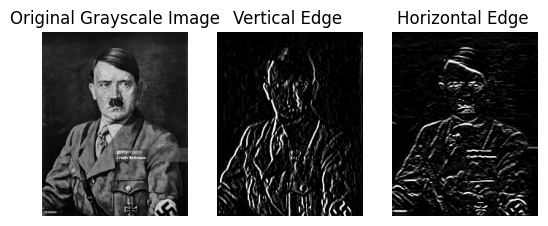

In [50]:
path6 = "/kaggle/input/images/image dataset/image 6.jpeg"
img = cv2.imread(path6)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
K_vertical = np.array([[-1, 0, 1], 
                [-1, 0, 1], 
                [-1, 0, 1]])

K_horizontal = np.array([[-1, -1, -1], 
                [0,  0,  0], 
                [1,  1,  1]])

vertical_edges = cv2.filter2D(img, -1, K_vertical)
horizontal_edges = cv2.filter2D(img, -1, K_horizontal)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title("Vertical Edge ")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title("Horizontal Edge ")
plt.axis("off")

plt.show()


# Explaination
vertical kernal detects edges accross x -axis by follwing the change alog the axis


Horixontal kernal detects edges accross y -axis by follwing the change alog the axis

# STEP 5

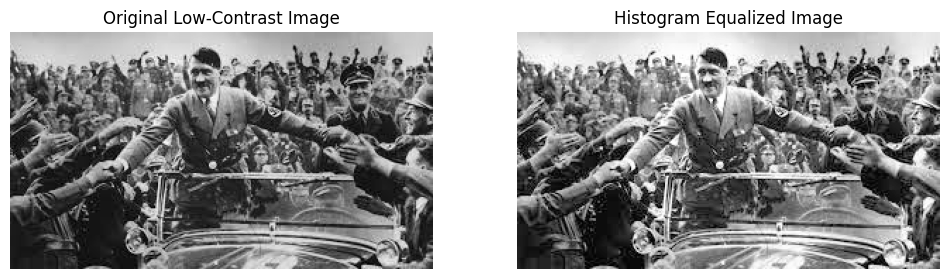

In [51]:
path7 = "/kaggle/input/images/image dataset/image 7.jpeg"
img = cv2.imread(path7)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
equalized_img = cv2.equalizeHist(img)
# Plot original vs. equalized image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Low-Contrast Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.show()


# Observation 
The image becomes sherper with enchanged contrast after equlization 

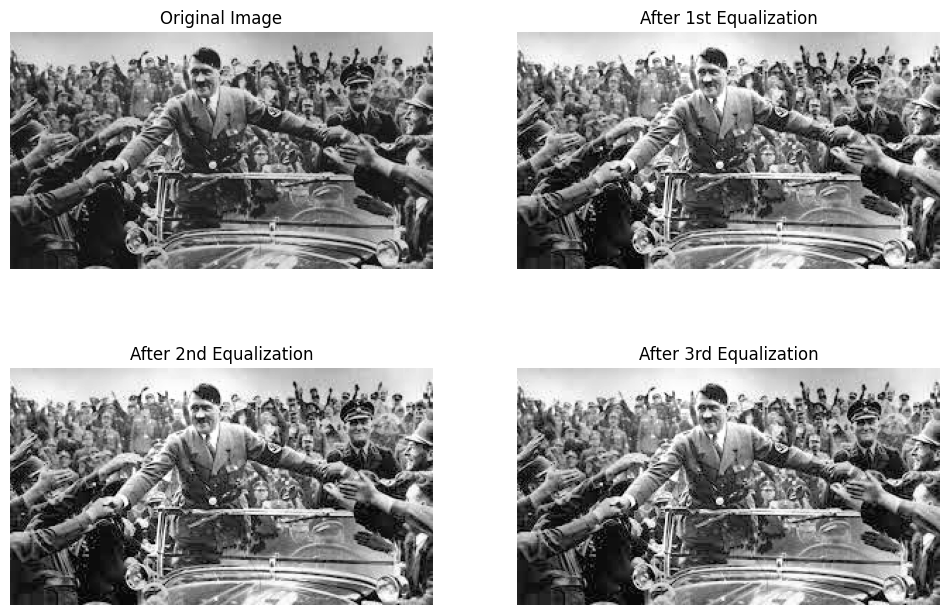

In [52]:
eq1 = cv2.equalizeHist(img)
eq2 = cv2.equalizeHist(eq1)
eq3 = cv2.equalizeHist(eq2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(eq1, cmap='gray')
plt.title("After 1st Equalization")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(eq2, cmap='gray')
plt.title("After 2nd Equalization")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(eq3, cmap='gray')
plt.title("After 3rd Equalization")
plt.axis("off")

plt.show()

# Observation 
after first eq the image becomes a bit clear but after that there seems no improvement . With only eyes it can be seen that 3rd and 4th eq doesn't do anything . 